### Libraries and functions

In [1]:
from __future__ import print_function
%matplotlib inline


import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
from ipywidgets import widgets
from IPython.display import display
import time

# LSST libraries, MAF metrics

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.db as db
from lsst.sims.featureScheduler import utils as schedUtils
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

# Py file with functions
from functions import *

### Init data

In [2]:

mjd_array = [] # array with cadence data
opsim_array = [] # name for the images 
name_array = [] 

# for the reading of CSV file with input data
import csv

# Read CSV file
with open('data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        fil = row['filter'];
        if not row['ra'] or len(row['ra']) == 0 :
            ra = 0;
        else:
            ra = int(row['ra'])
        if not row['dec'] or len(row['dec']) == 0 :
            dec = np.radians(-30);
        else:
            dec = np.radians(int(row['dec']));
        noise = float(row['noise']);
        amp = float(row['amp']);
        opsim = row['realisation'];
        dbfile = '/home/idies/workspace/lsst_cadence/FBS_' + row['fbs'] +'/' + opsim;
        opsdb = db.OpsimDatabase(dbfile)
        mjd =  getOpSimCadence(opsdb, opsim, ra, dec, fil);        
        mjd_array.append(mjd);
        opsim_array.append(opsim);
        name_array.append(opsim[0: opsim.index('_v' + row['fbs'])] + '_' + fil );
        print(opsim[0: opsim.index('_v' + row['fbs'])] + '_' + fil);
        



### Get plots

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


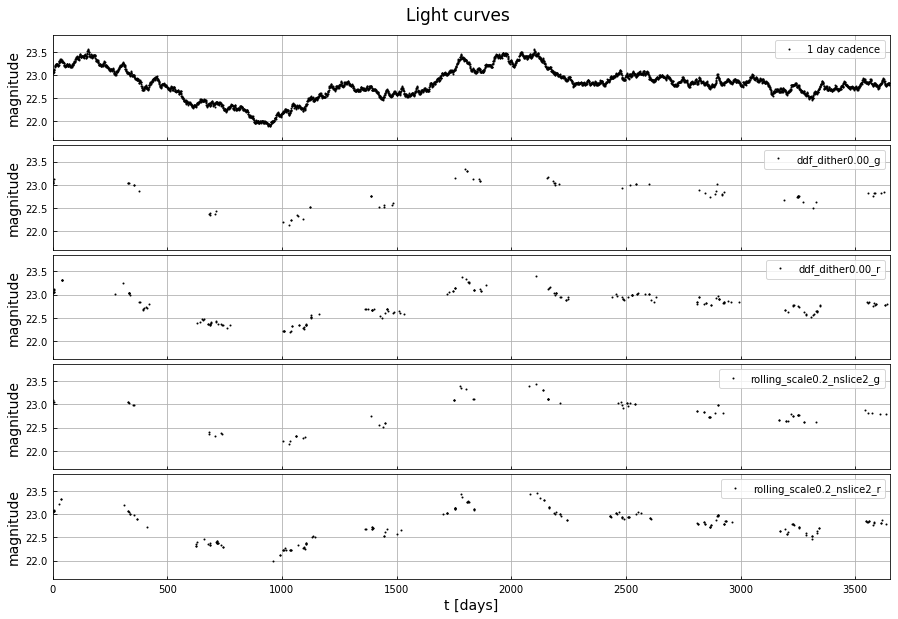

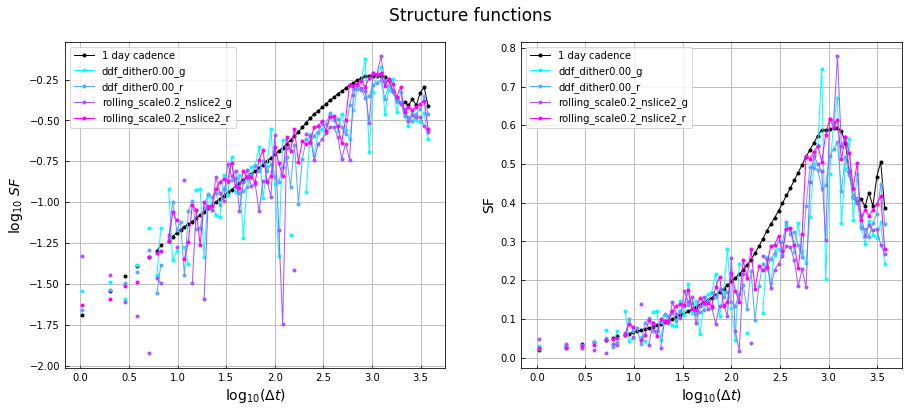

In [3]:
# Start plot
# Plots Fig. 1, 2 From Kovacevic et al., 2021


np.random.seed(0)
long=10*365 # survey duration in days
deltatc=1. # cadence for LC_conti()

LC_SF_viz(long, deltatc, mjd_array, name_array);

ddf_dither0.00_g


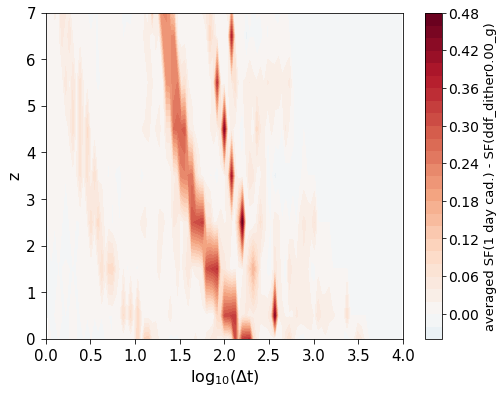

ddf_dither0.00_r


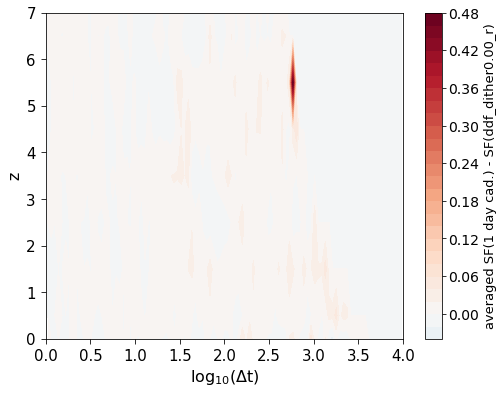

rolling_scale0.2_nslice2_g


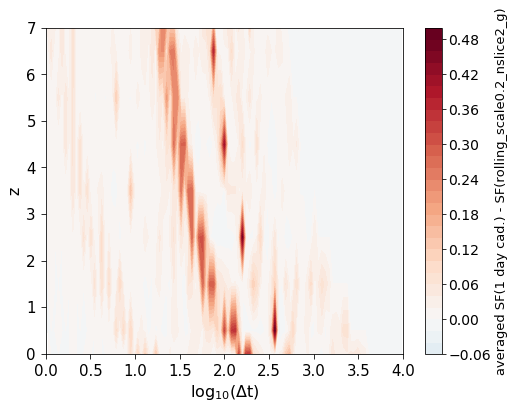

rolling_scale0.2_nslice2_r


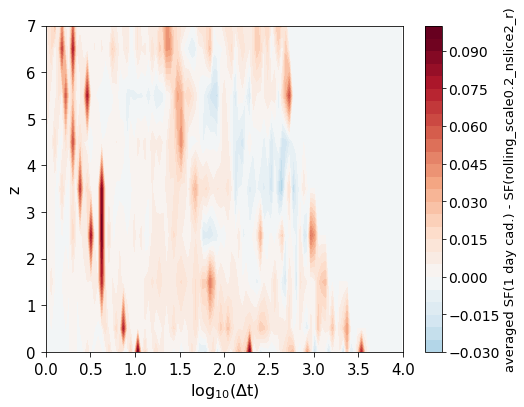

In [4]:
# Plots Fig. 10 From Kovacevic et al., 2021

i = 0;
np.random.seed(0);
for mjd in mjd_array:
    print( name_array[i] ); 
    SF_heatmap(mjd, name_array[i], name_array[i]);
    i = i + 1;